In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('electrical_dataset.csv')
df.head(5)

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
0,01-12-2024 00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834
1,01-12-2024 00:01,219.308679,4.206038,894.158159,0.939144,NaN,46.477508
2,01-12-2024 00:02,223.238443,4.143615,NaN,0.864156,17.952615,64.195316
3,01-12-2024 00:03,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868
4,01-12-2024 00:04,NaN,5.165739,1081.262142,0.931754,21.783244,55.741660


In [3]:
df.describe()

,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
count,9500.000000,9600.000000,9700.000000,9800.000000,9700.000000,9600.000000
mean,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
std,5.007974,0.579586,143.312091,0.040413,7.363127,11.547591
min,200.387999,4.000096,747.956441,0.850001,3.005629,30.000337
25%,216.654181,4.514213,989.925889,0.885059,13.225365,40.117437
50%,219.997444,5.020268,1100.829462,0.920172,20.011891,49.917048
75%,223.348834,5.515116,1207.908605,0.954773,26.657589,60.105216
max,239.631189,5.999850,1498.874098,0.989985,36.151952,69.997588


In [4]:
df.isnull().sum()

Timestamp             0
Voltage (V)         500
Current (I)         400
Power (W)           300
Power_Factor        200
Temperature (°C)    300
Humidity (%)        400
dtype: int64

In [5]:
percentage=(df.isnull().sum()/len(df))*100
percentage

Timestamp           0.0
Voltage (V)         5.0
Current (I)         4.0
Power (W)           3.0
Power_Factor        2.0
Temperature (°C)    3.0
Humidity (%)        4.0
dtype: float64

In [6]:
df.columns

Index(['Timestamp', 'Voltage (V)', 'Current (I)', 'Power (W)', 'Power_Factor',
       'Temperature (°C)', 'Humidity (%)'],
      dtype='object')

In [7]:
df.describe()

,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
count,9500.000000,9600.000000,9700.000000,9800.000000,9700.000000,9600.000000
mean,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
std,5.007974,0.579586,143.312091,0.040413,7.363127,11.547591
min,200.387999,4.000096,747.956441,0.850001,3.005629,30.000337
25%,216.654181,4.514213,989.925889,0.885059,13.225365,40.117437
50%,219.997444,5.020268,1100.829462,0.920172,20.011891,49.917048
75%,223.348834,5.515116,1207.908605,0.954773,26.657589,60.105216
max,239.631189,5.999850,1498.874098,0.989985,36.151952,69.997588


In [8]:
columns=df.select_dtypes(include=['number']).columns
for column in columns:
    df.fillna({column:df[column].mean()},inplace=True)

# since the data is uniform with really less outliers, the empty columns can be replaced by the mean
# the data will still be uniform as the empty columns are being replaced by the mean and the mean and median will still remain the same

In [9]:
df.describe()

,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
std,4.881157,0.567875,141.145822,0.040007,7.251828,11.314259
min,200.387999,4.000096,747.956441,0.850001,3.005629,30.000337
25%,216.856189,4.539673,993.321731,0.885729,13.393067,40.506874
50%,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
75%,223.133397,5.495501,1204.749595,0.954266,26.492348,59.646597
max,239.631189,5.999850,1498.874098,0.989985,36.151952,69.997588


In [10]:
df.isnull().sum()

Timestamp           0
Voltage (V)         0
Current (I)         0
Power (W)           0
Power_Factor        0
Temperature (°C)    0
Humidity (%)        0
dtype: int64

In [11]:
# outliers in each column

for column in columns:
    Q25=df[column].quantile(0.25)
    Q75=df[column].quantile(0.75)
    IQR=Q75-Q25
    lower_bound=Q25-1.5*IQR
    upper_bound=Q75+1.5*IQR
    outliers=df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    outlier_count=outliers[column].count()
    print(f"{column} : {outlier_count}")

Voltage (V) : 127
Current (I) : 0
Power (W) : 0
Power_Factor : 0
Temperature (°C) : 0
Humidity (%) : 0


In [12]:
df_minmax=(df['Power (W)']-df['Power (W)'].min())/(df['Power (W)'].max()-df['Power (W)'].min())
# df_minmax

In [13]:
df_minmax.describe()
# data is between 0 and 1

count    10000.000000
mean         0.472278
std          0.187964
min          0.000000
25%          0.326754
50%          0.472278
75%          0.608313
max          1.000000
Name: Power (W), dtype: float64

In [14]:
time=df['Timestamp']
df['Timestamp']=pd.to_datetime(time)
#this makes it in pandas ka format which it understands

def categorize_shift(hour):
    if 6<=hour<=12:
        return 'Morning'
    elif 12<=hour<=18:
        return 'Afternoon'
    elif 18<=hour<=24:
        return 'Evening'
    elif (0<=hour<=6):
        return 'Night'

df['Shift']=df['Timestamp'].dt.hour.apply(categorize_shift)
#helps us to obtain only the hour part of time

group_shift=df.groupby('Shift')[['Power (W)','Temperature (°C)']].mean()
group_shift

,Power (W),Temperature (°C)
Shift,,
Afternoon,1103.010935,20.181255
Evening,1101.661142,20.145706
Morning,1103.701262,19.976995
Night,1101.649757,19.741165


In [15]:
df['Energy Efficiency']=df['Power (W)']*df['Power_Factor']

In [16]:
df[['Energy Efficiency','Temperature (°C)']].corr()

,Energy Efficiency,Temperature (°C)
Energy Efficiency,1.000000,-0.008361
Temperature (°C),-0.008361,1.000000


In [17]:
df[['Energy Efficiency','Temperature (°C)']].corr().iloc[0,1]

-0.008361155076957432

In [18]:
df.columns

Index(['Timestamp', 'Voltage (V)', 'Current (I)', 'Power (W)', 'Power_Factor',
       'Temperature (°C)', 'Humidity (%)', 'Shift', 'Energy Efficiency'],
      dtype='object')

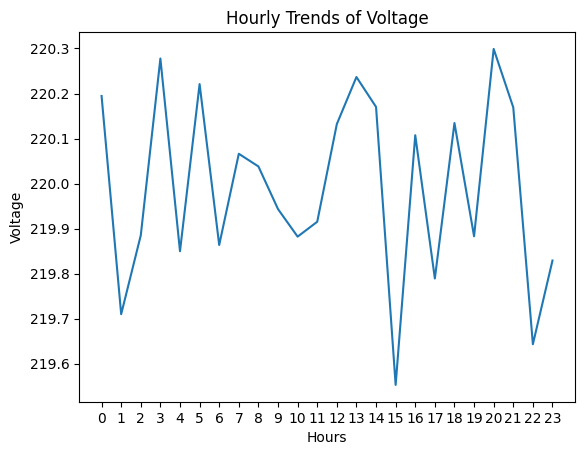

In [19]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Hour']=df['Timestamp'].dt.hour
hourly_avg=df.groupby('Hour')['Voltage (V)'].mean()
plt.plot(hourly_avg.index,hourly_avg.values)
plt.title('Hourly Trends of Voltage')
plt.xlabel('Hours')
plt.ylabel('Voltage')
plt.xticks(np.arange(0,24,1))
plt.show()

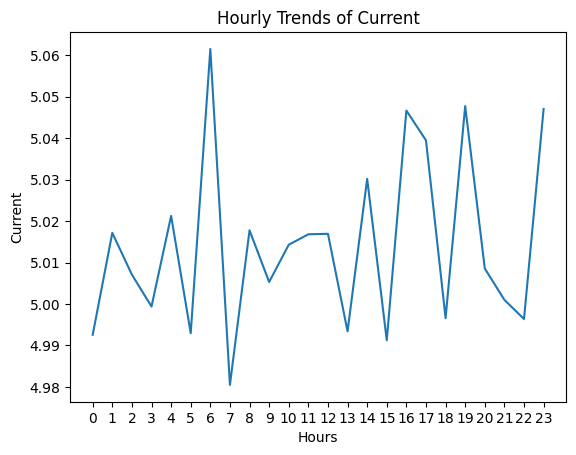

In [20]:
hourly_avg=df.groupby('Hour')['Current (I)'].mean()
plt.plot(hourly_avg.index,hourly_avg.values)
plt.title('Hourly Trends of Current')
plt.xlabel('Hours')
plt.ylabel('Current')
plt.xticks(np.arange(0,24,1))
plt.show()

In [34]:
bins=[30,50,60,70]
labels=['Low','Medium','High']
df['Humidity Category']=pd.cut(df['Humidity (%)'],bins=bins,labels=labels,right=True)
# pd.cut is used to categorize data into bins, right is basically to show that 50 will be counted as medium not low
# qcut is another function that will do it dynamically and allocate equal bin size
df['Humidity Category Number']=df['Humidity Category'].astype('category').cat.codes
# this converts them into numbers automatically for their low medium high
df.head(5)

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift,Energy Efficiency,Hour,Humidity Category,Humidity Category Number
0,2024-01-12 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,Night,849.825213,0,Low,0
1,2024-01-12 00:01:00,219.308679,4.206038,894.158159,0.939144,20.003119,46.477508,Night,839.743684,0,Low,0
2,2024-01-12 00:02:00,223.238443,4.143615,1102.598216,0.864156,17.952615,64.195316,Night,952.816878,0,High,2
3,2024-01-12 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,Night,933.121160,0,Low,0
4,2024-01-12 00:04:00,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,Night,1007.470516,0,Medium,1


In [22]:
correlation_matrix=df.select_dtypes(include='number').corr()
# here we dont need to include hour and humidity category number
correlation_matrix.drop(columns=['Hour','Humidity Category Number'],axis=1)
np.fill_diagonal(correlation_matrix.values,np.nan)
# this will ignore diagonal self correlation which is always 1
max_value=correlation_matrix.max().max()
max_pair=correlation_matrix.stack().idxmax()
print(max_value)
print(max_pair)

0.9452872366516372
('Power (W)', 'Energy Efficiency')


In [23]:
from sklearn.model_selection import train_test_split
target=df['Power (W)']
features=df.drop(columns='Power (W)')
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [24]:
df

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift,Energy Efficiency,Hour,Humidity Category,Humidity Category Number
0,2024-01-12 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,Night,849.825213,0,Low,0
1,2024-01-12 00:01:00,219.308679,4.206038,894.158159,0.939144,20.003119,46.477508,Night,839.743684,0,Low,0
2,2024-01-12 00:02:00,223.238443,4.143615,1102.598216,0.864156,17.952615,64.195316,Night,952.816878,0,High,2
3,2024-01-12 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,Night,933.121160,0,Low,0
4,2024-01-12 00:04:00,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,Night,1007.470516,0,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-07-12 22:35:00,226.505510,5.365876,1186.219693,0.858940,20.553140,65.807219,Evening,1018.891282,22,High,2
9996,2024-07-12 22:36:00,219.992912,5.699823,1219.255942,0.890498,18.586842,35.774593,Evening,1085.744394,22,Low,0
9997,2024-07-12 22:37:00,216.473416,4.431447,992.233503,0.974504,20.791749,61.015434,Evening,966.935789,22,High,2
9998,2024-07-12 22:38:00,222.478828,5.507653,1260.912502,0.883132,19.020961,50.003748,Evening,1113.552513,22,Medium,1


In [25]:
df.isnull().sum()

Timestamp                   0
Voltage (V)                 0
Current (I)                 0
Power (W)                   0
Power_Factor                0
Temperature (°C)            0
Humidity (%)                0
Shift                       0
Energy Efficiency           0
Hour                        0
Humidity Category           0
Humidity Category Number    0
dtype: int64

In [26]:
target=df['Power (W)']
feature_columns=['Voltage (V)','Current (I)','Temperature (°C)','Humidity (%)','Power_Factor']
features=df[feature_columns]

In [27]:
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_test.size)
print(x_train.columns)
print(y_train)

40000
8000
10000
2000
Index(['Voltage (V)', 'Current (I)', 'Temperature (°C)', 'Humidity (%)',
       'Power_Factor'],
      dtype='object')
9254    1014.698423
1561     821.558190
1670    1065.886124
6087     965.600403
6669    1148.763486
           ...     
5734    1243.413604
5191    1034.963601
5390     960.254372
860     1087.085081
7270     934.910795
Name: Power (W), Length: 8000, dtype: float64


In [28]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
print(model1.coef_)
print(model1.intercept_)

[ 4.62106126e+00  2.10333086e+02 -3.20410853e-02  1.41070902e-01
  1.92315072e+01]
-992.8031501062194


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model2=RandomForestRegressor(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)
predictions2=model2.predict(x_test)
mse2=mean_squared_error(y_test,predictions2)
mae2=mean_absolute_error(y_test,predictions2)
r22=r2_score(y_test,predictions2)
model1.fit(x_train,y_train)
predictions1=model1.predict(x_test)
mse1=mean_squared_error(y_test,predictions1)
mae1=mean_absolute_error(y_test,predictions1)
r21=r2_score(y_test,predictions1)
print(mse2,mse1)
print(mae2,mae1)
print(r22,r21)

# this shows that the mean square error and mean absolute error for model 1 is less than that of model 2 which is better as it shows that the predictions are closer to the actual value
# an r2 score closer to 1 indicates that the predictions are closer to the model1 than model2
# a linear regression model assumes linear relationship between features and target variables whereas a random forest agressor model assumes a non linear relationship but the random forest model handles non linear and complex data patterns more effectively

5438.20656014514 4948.657672758479
61.3109279876011 58.97800635104056
0.7263804188869555 0.7510117307026509


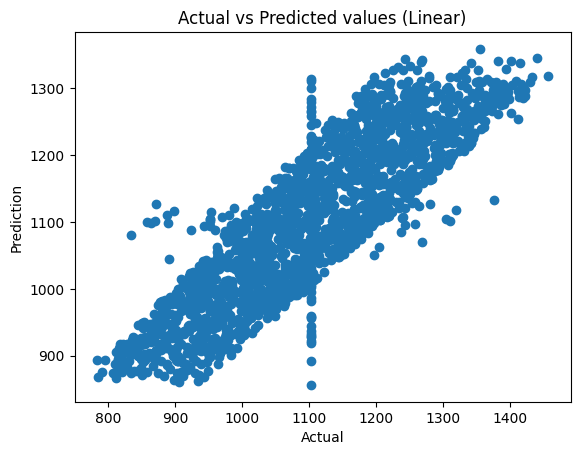

In [30]:
plt.scatter(y_test,predictions1)
plt.title('Actual vs Predicted values (Linear)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

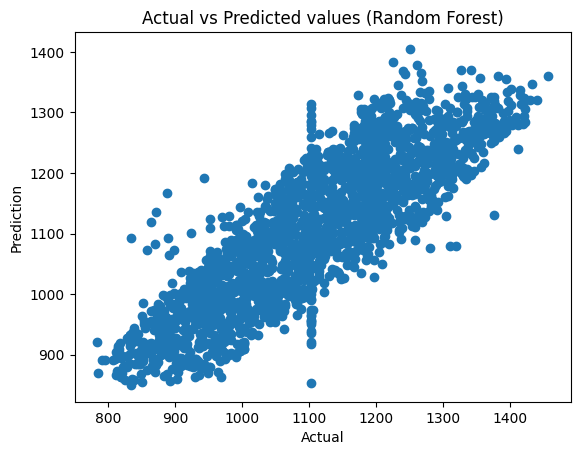

In [31]:
plt.scatter(y_test,predictions2)
plt.title('Actual vs Predicted values (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

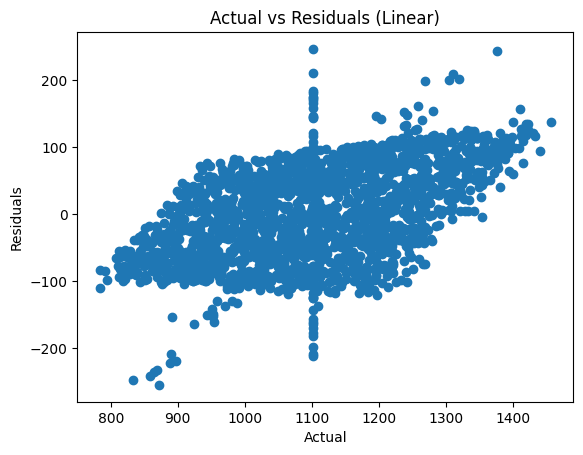

In [32]:
residuals1=y_test-predictions1
plt.scatter(y_test,residuals1)
plt.title('Actual vs Residuals (Linear)')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()

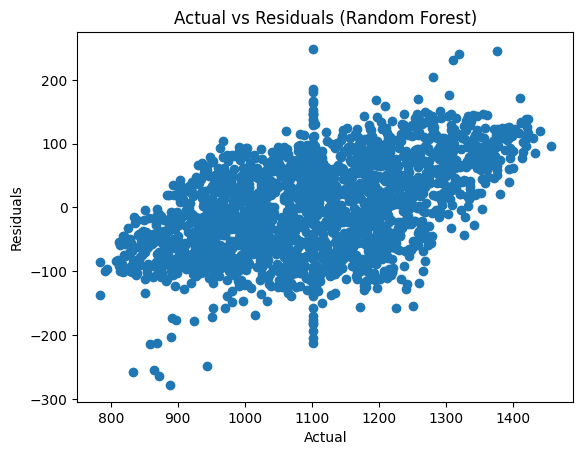

In [33]:
residuals2=y_test-predictions2
plt.scatter(y_test,residuals2)
plt.title('Actual vs Residuals (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()